## Generate the plots for the wild mammal biomass paper

In [2]:
%run -m generate_maps

# plot_mass_density_map_from_file()

/home/dan/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.6.2-CAPI-1.10.2 4d2925d6) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
gridded_mammal_mass = gpd.read_file('map_data/gridded_mammal_mass_dec20/gridded_mammal_mass.shp')
gridded_mammal_mass = gridded_mammal_mass.rename(columns={"total_ma_1": "total_mass_Mt"})
gridded_mammal_mass = gridded_mammal_mass.rename(columns={"total_ma_2": "total_mass_kg"})
gridded_mammal_mass = gridded_mammal_mass.rename(columns={"total_ma_3": "total_mass_kg_km2"})

In [ ]:
continents_polygon = gpd.GeoDataFrame(get_continent_data_from_file()).rename(columns={0: "geometry"})
continents_polygon.crs = "EPSG:6933"


<AxesSubplot:label='verbosity coefficient', title={'center':'Wild Mammal Mass Density'}>

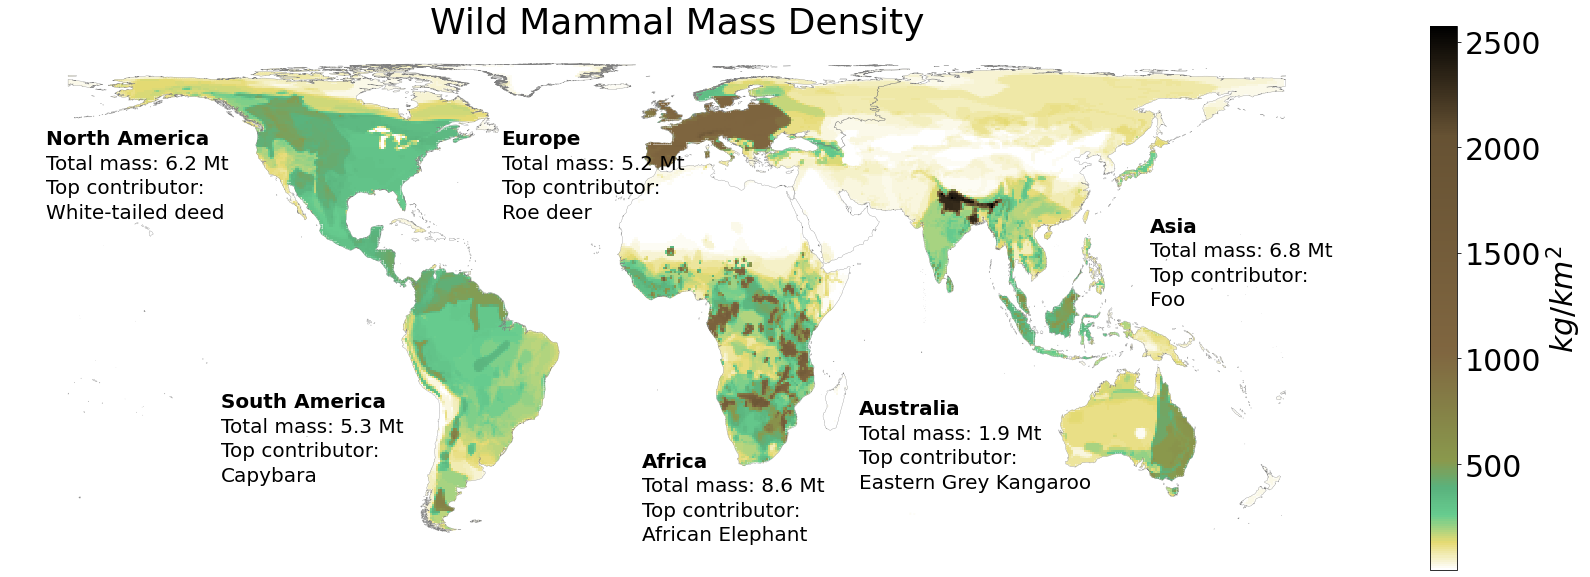

In [23]:
plt.rcParams["figure.figsize"] = (30, 10)

font = {'weight': 'normal',
        'size': 30}
plt.rc('font', **font)
fig, ax = pyplot.subplots(1, 1)
ax.axis('off')
# cmap = plt.cm.get_cmap('gist_earth').reversed()
cmap = gen_custom_cmap()
ax.set_label('verbosity coefficient')
ax.set_title('Wild Mammal Mass Density')
base = gridded_mammal_mass.plot(column='total_mass_kg_km2' ,ax=ax, legend=True, cmap=cmap,
                         legend_kwds={'label': r"$kg/km^2$"})
continents = ['North America','South America','Asia','Australia','Africa','Europe']
top_conributors = ['White-tailed deed','Capybara','Foo','Eastern Grey Kangaroo','African Elephant','Roe deer']
total_mass = ['6.2','5.3','6.8','1.9','8.6','5.2']
locations = [(-1.8*10**7,5*10**6),      #North America
             (-1.3*10**7,-2.5*10**6),   #South America
             (1.35*10**7,2.5*10**6),    #Asia
             (0.52*10**7,-2.7*10**6),   #Australia
             (-0.1*10**7,-4.2*10**6),   #Africa
             (-0.5*10**7,5*10**6)     #Europe
            ]

delta = (0,7*10**5)


for continent, loc, mass, species in zip(continents, locations, total_mass, top_conributors):
    base.annotate(text=continent, xy=loc, ha='left', size = 20, weight = 'bold')
#     base.annotate(text='Mass density:', xy=np.subtract(loc, delta), ha='left', size = 20)
    base.annotate(text='Total mass: '+mass+' Mt', xy=np.subtract(loc, np.multiply(delta,(1,1))), ha='left', size = 20)
    base.annotate(text='Top contributor: ', xy=np.subtract(loc, np.multiply(delta,(1,2))), ha='left', size = 20)
    base.annotate(species, xy=np.subtract(loc, np.multiply(delta,(1,3))), ha='left', size = 20)


continents_polygon.plot(ax=base, fc='none', ec='grey', linewidth=0.3)